# Generate Log Mel Spectrograms

Notebook ini akan memproses semua file audio di dataclean_cough dan dataclean_vowel,
melakukan preprocessing, dan menghasilkan log mel spectrogram untuk setiap file.

Output akan disimpan di:
- `dataclean_cough_log_mel/`
- `dataclean_vowel_log_mel/`

## 1. Import Libraries

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
from pathlib import Path
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

print("Libraries imported successfully!")

Libraries imported successfully!


## 2. Configuration

Parameter yang sama dengan mfcc.ipynb untuk konsistensi

In [ ]:
# Audio parameters
SAMPLE_RATE = 16000
DURATION = 1.0
N_FFT = 1024
HOP_LENGTH = 256
WIN_LENGTH = 1024
N_MELS = 40

# Paths
BASE_PATH = Path('/mnt/ml_storage/Final_Project/SOURCE2')
COUGH_INPUT_PATH = BASE_PATH / 'dataclean_cough_1'
VOWEL_INPUT_PATH = BASE_PATH / 'dataclean_vowel_1'
COUGH_OUTPUT_PATH = BASE_PATH / 'dataclean_cough_log_mel_1'
VOWEL_OUTPUT_PATH = BASE_PATH / 'dataclean_vowel_log_mel_1'

# Figure parameters
FIG_DPI = 100
FIG_SIZE = (10, 6)

print("Configuration:")
print(f"  Sample Rate: {SAMPLE_RATE} Hz")
print(f"  Duration: {DURATION} seconds")
print(f"  N_FFT: {N_FFT}")
print(f"  Hop Length: {HOP_LENGTH}")
print(f"  Win Length: {WIN_LENGTH}")
print(f"  N_MELS: {N_MELS}")
print(f"\nPaths:")
print(f"  Cough Input: {COUGH_INPUT_PATH}")
print(f"  Vowel Input: {VOWEL_INPUT_PATH}")
print(f"  Cough Output: {COUGH_OUTPUT_PATH}")
print(f"  Vowel Output: {VOWEL_OUTPUT_PATH}")

Configuration:
  Sample Rate: 16000 Hz
  Duration: 1.0 seconds
  N_FFT: 1024
  Hop Length: 256
  Win Length: 1024
  N_MELS: 40

Paths:
  Cough Input: /mnt/ml_storage/Final_Project/SOURCE2/dataclean_cough_1
  Vowel Input: /mnt/ml_storage/Final_Project/SOURCE2/dataclean_vowel_1
  Cough Output: /mnt/ml_storage/Final_Project/SOURCE2/dataclean_cough_log_mel_1
  Vowel Output: /mnt/ml_storage/Final_Project/SOURCE2/dataclean_vowel_log_mel_1


## 3. Helper Functions

In [8]:
def load_and_preprocess_audio(audio_path, sample_rate=SAMPLE_RATE, duration=DURATION):
    """
    Load audio file dan preprocessing sesuai dengan mfcc.ipynb
    
    Args:
        audio_path: Path ke file audio
        sample_rate: Sample rate target
        duration: Durasi target dalam detik
    
    Returns:
        audio: Preprocessed audio array
    """
    # Load audio
    audio, sr = librosa.load(audio_path, sr=sample_rate)
    
    # Segment to target duration
    target_samples = int(sample_rate * duration)
    if len(audio) > target_samples:
        audio = audio[:target_samples]
    else:
        audio = np.pad(audio, (0, target_samples - len(audio)), mode='constant')
    
    return audio


def generate_log_mel_spectrogram(audio, sample_rate=SAMPLE_RATE, n_fft=N_FFT, 
                                 hop_length=HOP_LENGTH, n_mels=N_MELS):
    """
    Generate log mel spectrogram dari audio
    
    Args:
        audio: Audio array
        sample_rate: Sample rate
        n_fft: FFT window size
        hop_length: Hop length
        n_mels: Number of mel bands
    
    Returns:
        log_mel_spec: Log mel spectrogram
    """
    # Generate mel spectrogram
    mel_spec = librosa.feature.melspectrogram(
        y=audio,
        sr=sample_rate,
        n_fft=n_fft,
        hop_length=hop_length,
        n_mels=n_mels,
        fmax=8000
    )
    
    # Convert to log scale (dB)
    log_mel_spec = librosa.power_to_db(mel_spec, ref=np.max)
    
    return log_mel_spec


def save_log_mel_spectrogram(log_mel_spec, output_path, sample_rate=SAMPLE_RATE, 
                             hop_length=HOP_LENGTH, fig_size=FIG_SIZE, dpi=FIG_DPI):
    """
    Save log mel spectrogram sebagai gambar pure (tanpa axis, labels, dll)
    
    Args:
        log_mel_spec: Log mel spectrogram
        output_path: Path untuk menyimpan gambar
        sample_rate: Sample rate
        hop_length: Hop length
        fig_size: Figure size (width, height)
        dpi: DPI untuk output gambar
    """
    # Create figure without axes
    fig = plt.figure(figsize=fig_size, frameon=False)
    ax = plt.Axes(fig, [0., 0., 1., 1.])
    ax.set_axis_off()
    fig.add_axes(ax)
    
    # Display spectrogram tanpa axis
    ax.imshow(log_mel_spec, aspect='auto', origin='lower', cmap='viridis')
    
    # Create output directory if not exists
    output_path.parent.mkdir(parents=True, exist_ok=True)
    
    # Save figure
    plt.savefig(output_path, dpi=dpi, bbox_inches='tight', pad_inches=0)
    plt.close()


def process_audio_file(audio_path, output_path):
    """
    Process single audio file: load, preprocess, generate log mel spectrogram, dan save
    
    Args:
        audio_path: Path ke input audio file
        output_path: Path untuk output gambar
    
    Returns:
        success: Boolean indicating success
    """
    try:
        # Load and preprocess
        audio = load_and_preprocess_audio(audio_path)
        
        # Generate log mel spectrogram
        log_mel_spec = generate_log_mel_spectrogram(audio)
        
        # Save
        save_log_mel_spectrogram(log_mel_spec, output_path)
        
        return True
    except Exception as e:
        print(f"Error processing {audio_path}: {str(e)}")
        return False


print("Helper functions defined successfully!")

Helper functions defined successfully!


## 4. Test pada Satu File

Mari kita test fungsi-fungsi di atas pada satu file untuk memastikan semuanya bekerja dengan baik

Testing with file: /mnt/ml_storage/Final_Project/SOURCE2/dataclean_cough_1/004db89f19f9b/cough.wav
Output will be saved to: /mnt/ml_storage/Final_Project/SOURCE2/dataclean_cough_log_mel_1/004db89f19f9b/log_mel_spectrogram.png

Audio loaded successfully!
  Shape: (16000,)
  Duration: 1.00 seconds
  Min: -0.954943, Max: 1.014533

Log Mel Spectrogram generated!
  Shape: (40, 63)
  Min: -80.00 dB, Max: 0.00 dB

Audio loaded successfully!
  Shape: (16000,)
  Duration: 1.00 seconds
  Min: -0.954943, Max: 1.014533

Log Mel Spectrogram generated!
  Shape: (40, 63)
  Min: -80.00 dB, Max: 0.00 dB


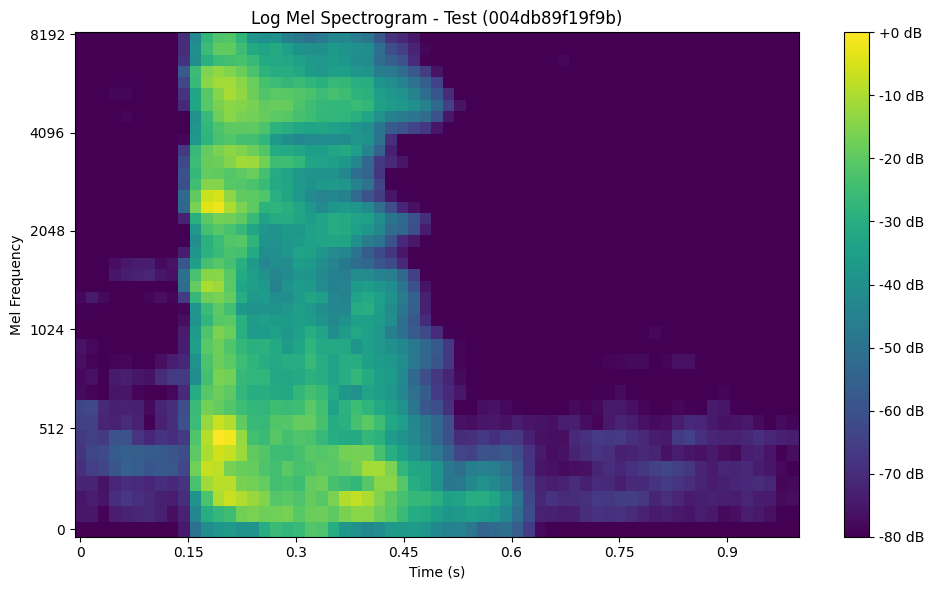


Test spectrogram saved to: /mnt/ml_storage/Final_Project/SOURCE2/dataclean_cough_log_mel_1/004db89f19f9b/log_mel_spectrogram.png


In [9]:
# Test dengan satu file cough
test_id = '004db89f19f9b'
test_cough_path = COUGH_INPUT_PATH / test_id / 'cough.wav'
test_output_path = COUGH_OUTPUT_PATH / test_id / 'log_mel_spectrogram.png'

print(f"Testing with file: {test_cough_path}")
print(f"Output will be saved to: {test_output_path}")

if test_cough_path.exists():
    # Load and preprocess
    audio = load_and_preprocess_audio(test_cough_path)
    print(f"\nAudio loaded successfully!")
    print(f"  Shape: {audio.shape}")
    print(f"  Duration: {len(audio)/SAMPLE_RATE:.2f} seconds")
    print(f"  Min: {audio.min():.6f}, Max: {audio.max():.6f}")
    
    # Generate log mel spectrogram
    log_mel_spec = generate_log_mel_spectrogram(audio)
    print(f"\nLog Mel Spectrogram generated!")
    print(f"  Shape: {log_mel_spec.shape}")
    print(f"  Min: {log_mel_spec.min():.2f} dB, Max: {log_mel_spec.max():.2f} dB")
    
    # Display
    plt.figure(figsize=FIG_SIZE)
    librosa.display.specshow(
        log_mel_spec,
        sr=SAMPLE_RATE,
        hop_length=HOP_LENGTH,
        x_axis='time',
        y_axis='mel',
        cmap='viridis'
    )
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'Log Mel Spectrogram - Test ({test_id})')
    plt.xlabel('Time (s)')
    plt.ylabel('Mel Frequency')
    plt.tight_layout()
    plt.show()
    
    # Save
    save_log_mel_spectrogram(log_mel_spec, test_output_path)
    print(f"\nTest spectrogram saved to: {test_output_path}")
else:
    print(f"Test file not found: {test_cough_path}")

## 5. Get All Audio Files

Scan semua folder untuk menemukan file audio

In [10]:
def get_all_audio_files(base_path, audio_filename):
    """
    Get all audio files dari folder structure
    
    Args:
        base_path: Base path containing ID folders
        audio_filename: Name of audio file (e.g., 'cough.wav' or 'vowel.wav')
    
    Returns:
        list of tuples: (id_folder, audio_path)
    """
    audio_files = []
    
    # Iterate through all folders
    for id_folder in sorted(base_path.iterdir()):
        if id_folder.is_dir():
            audio_path = id_folder / audio_filename
            if audio_path.exists():
                audio_files.append((id_folder.name, audio_path))
    
    return audio_files


# Get all cough files
cough_files = get_all_audio_files(COUGH_INPUT_PATH, 'cough.wav')
print(f"Found {len(cough_files)} cough audio files")
print(f"First 5 files: {[f[0] for f in cough_files[:5]]}")

# Get all vowel files
vowel_files = get_all_audio_files(VOWEL_INPUT_PATH, 'vowel.wav')
print(f"\nFound {len(vowel_files)} vowel audio files")
print(f"First 5 files: {[f[0] for f in vowel_files[:5]]}")

Found 876 cough audio files
First 5 files: ['004db89f19f9b', '007238490a3f1', '00ad476fba37b', '00bcbaeb22f5f', '00cd3641085bc']

Found 869 vowel audio files
First 5 files: ['004db89f19f9b', '007238490a3f1', '00ad476fba37b', '00bcbaeb22f5f', '00cd3641085bc']


## 6. Process All Cough Files

Process semua file cough dan generate log mel spectrograms

In [11]:
print("Processing COUGH files...")
print(f"Total files: {len(cough_files)}")
print("="*60)

success_count = 0
failed_count = 0
failed_files = []

for id_folder, audio_path in tqdm(cough_files, desc="Processing cough files"):
    # Define output path
    output_path = COUGH_OUTPUT_PATH / id_folder / 'log_mel_spectrogram.png'
    
    # Process file
    if process_audio_file(audio_path, output_path):
        success_count += 1
    else:
        failed_count += 1
        failed_files.append((id_folder, audio_path))

print("\n" + "="*60)
print("COUGH FILES PROCESSING COMPLETE")
print("="*60)
print(f"Successfully processed: {success_count}/{len(cough_files)}")
print(f"Failed: {failed_count}/{len(cough_files)}")

if failed_files:
    print(f"\nFailed files:")
    for id_folder, audio_path in failed_files[:10]:  # Show first 10 failed files
        print(f"  - {id_folder}: {audio_path}")
    if len(failed_files) > 10:
        print(f"  ... and {len(failed_files)-10} more")

Processing COUGH files...
Total files: 876


Processing cough files: 100%|██████████| 876/876 [00:54<00:00, 15.99it/s]


COUGH FILES PROCESSING COMPLETE
Successfully processed: 876/876
Failed: 0/876


## 7. Process All Vowel Files

Process semua file vowel dan generate log mel spectrograms

In [12]:
print("Processing VOWEL files...")
print(f"Total files: {len(vowel_files)}")
print("="*60)

success_count = 0
failed_count = 0
failed_files = []

for id_folder, audio_path in tqdm(vowel_files, desc="Processing vowel files"):
    # Define output path
    output_path = VOWEL_OUTPUT_PATH / id_folder / 'log_mel_spectrogram.png'
    
    # Process file
    if process_audio_file(audio_path, output_path):
        success_count += 1
    else:
        failed_count += 1
        failed_files.append((id_folder, audio_path))

print("\n" + "="*60)
print("VOWEL FILES PROCESSING COMPLETE")
print("="*60)
print(f"Successfully processed: {success_count}/{len(vowel_files)}")
print(f"Failed: {failed_count}/{len(vowel_files)}")

if failed_files:
    print(f"\nFailed files:")
    for id_folder, audio_path in failed_files[:10]:  # Show first 10 failed files
        print(f"  - {id_folder}: {audio_path}")
    if len(failed_files) > 10:
        print(f"  ... and {len(failed_files)-10} more")

Processing VOWEL files...
Total files: 869


Processing vowel files: 100%|██████████| 869/869 [00:46<00:00, 18.78it/s]


VOWEL FILES PROCESSING COMPLETE
Successfully processed: 869/869
Failed: 0/869


## 8. Verification

Verify hasil processing dengan menampilkan beberapa contoh hasil

In [13]:
# Verify output folders
cough_output_folders = sorted([f for f in COUGH_OUTPUT_PATH.iterdir() if f.is_dir()])
vowel_output_folders = sorted([f for f in VOWEL_OUTPUT_PATH.iterdir() if f.is_dir()])

print("Output Verification:")
print("="*60)
print(f"Cough output folders: {len(cough_output_folders)}")
print(f"Vowel output folders: {len(vowel_output_folders)}")

# Count total images
cough_images = list(COUGH_OUTPUT_PATH.glob('*/log_mel_spectrogram.png'))
vowel_images = list(VOWEL_OUTPUT_PATH.glob('*/log_mel_spectrogram.png'))

print(f"\nTotal generated images:")
print(f"  Cough: {len(cough_images)}")
print(f"  Vowel: {len(vowel_images)}")
print(f"  Total: {len(cough_images) + len(vowel_images)}")

Output Verification:
Cough output folders: 876
Vowel output folders: 869

Total generated images:
  Cough: 876
  Vowel: 869
  Total: 1745


## 9. Display Sample Results

Tampilkan beberapa contoh log mel spectrogram yang sudah di-generate

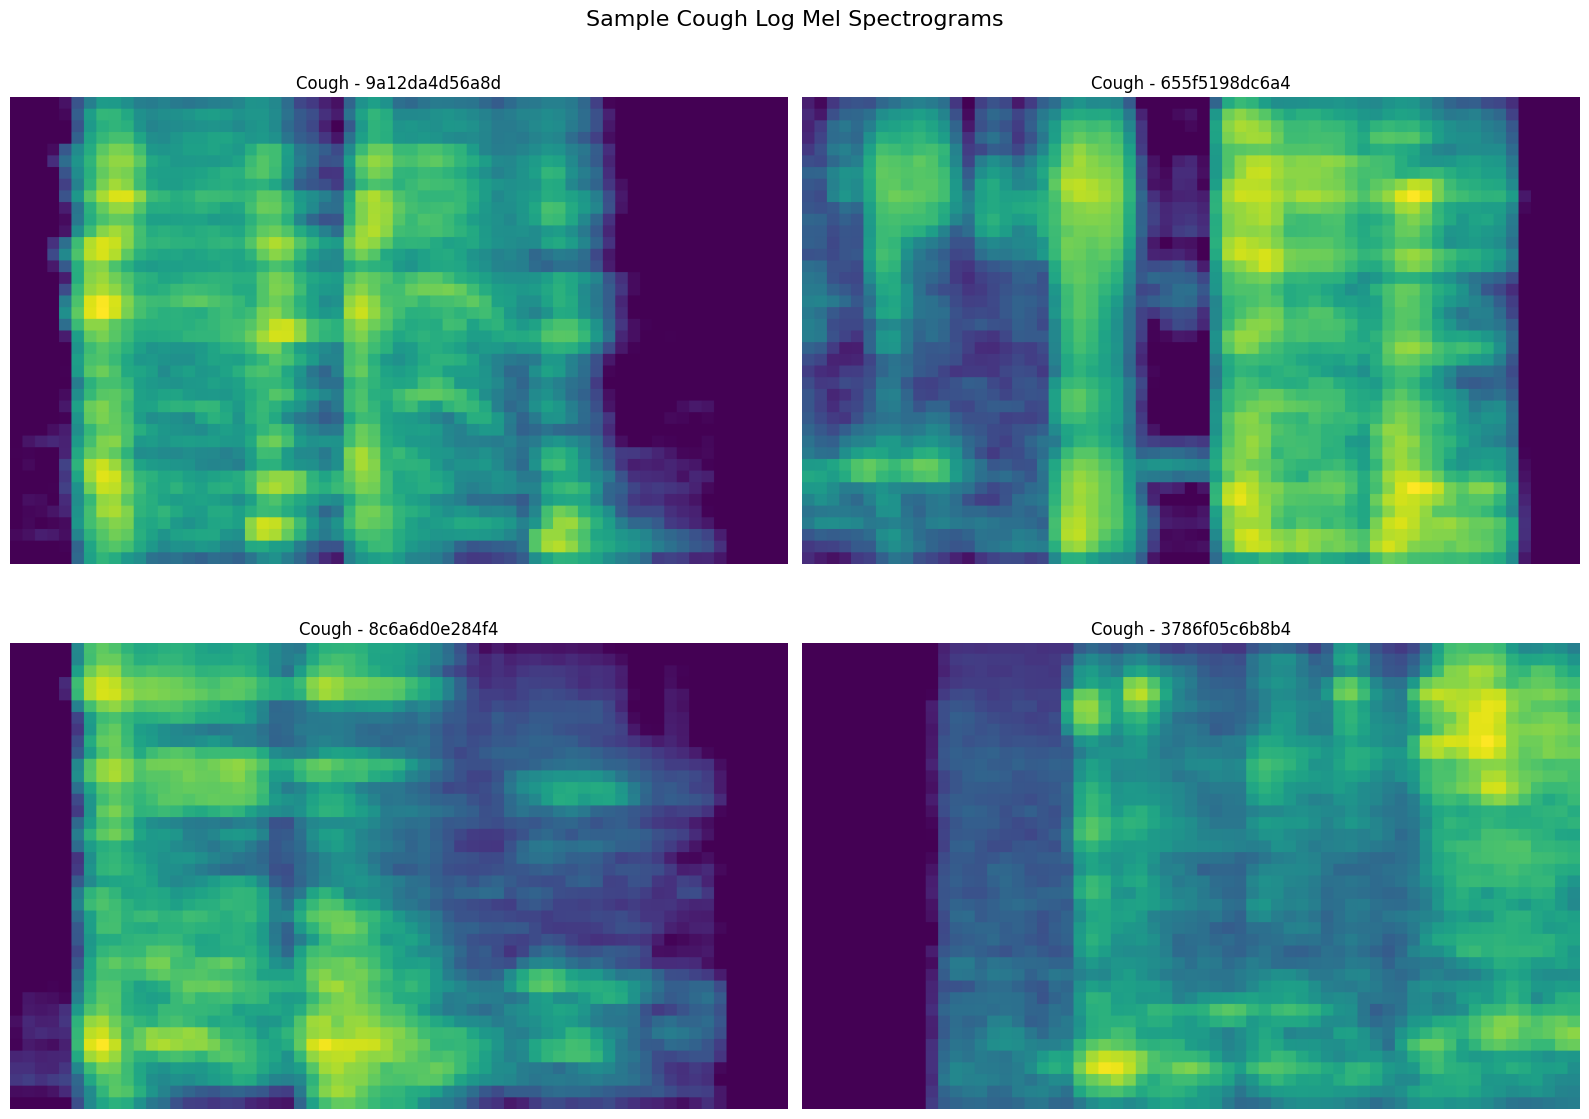

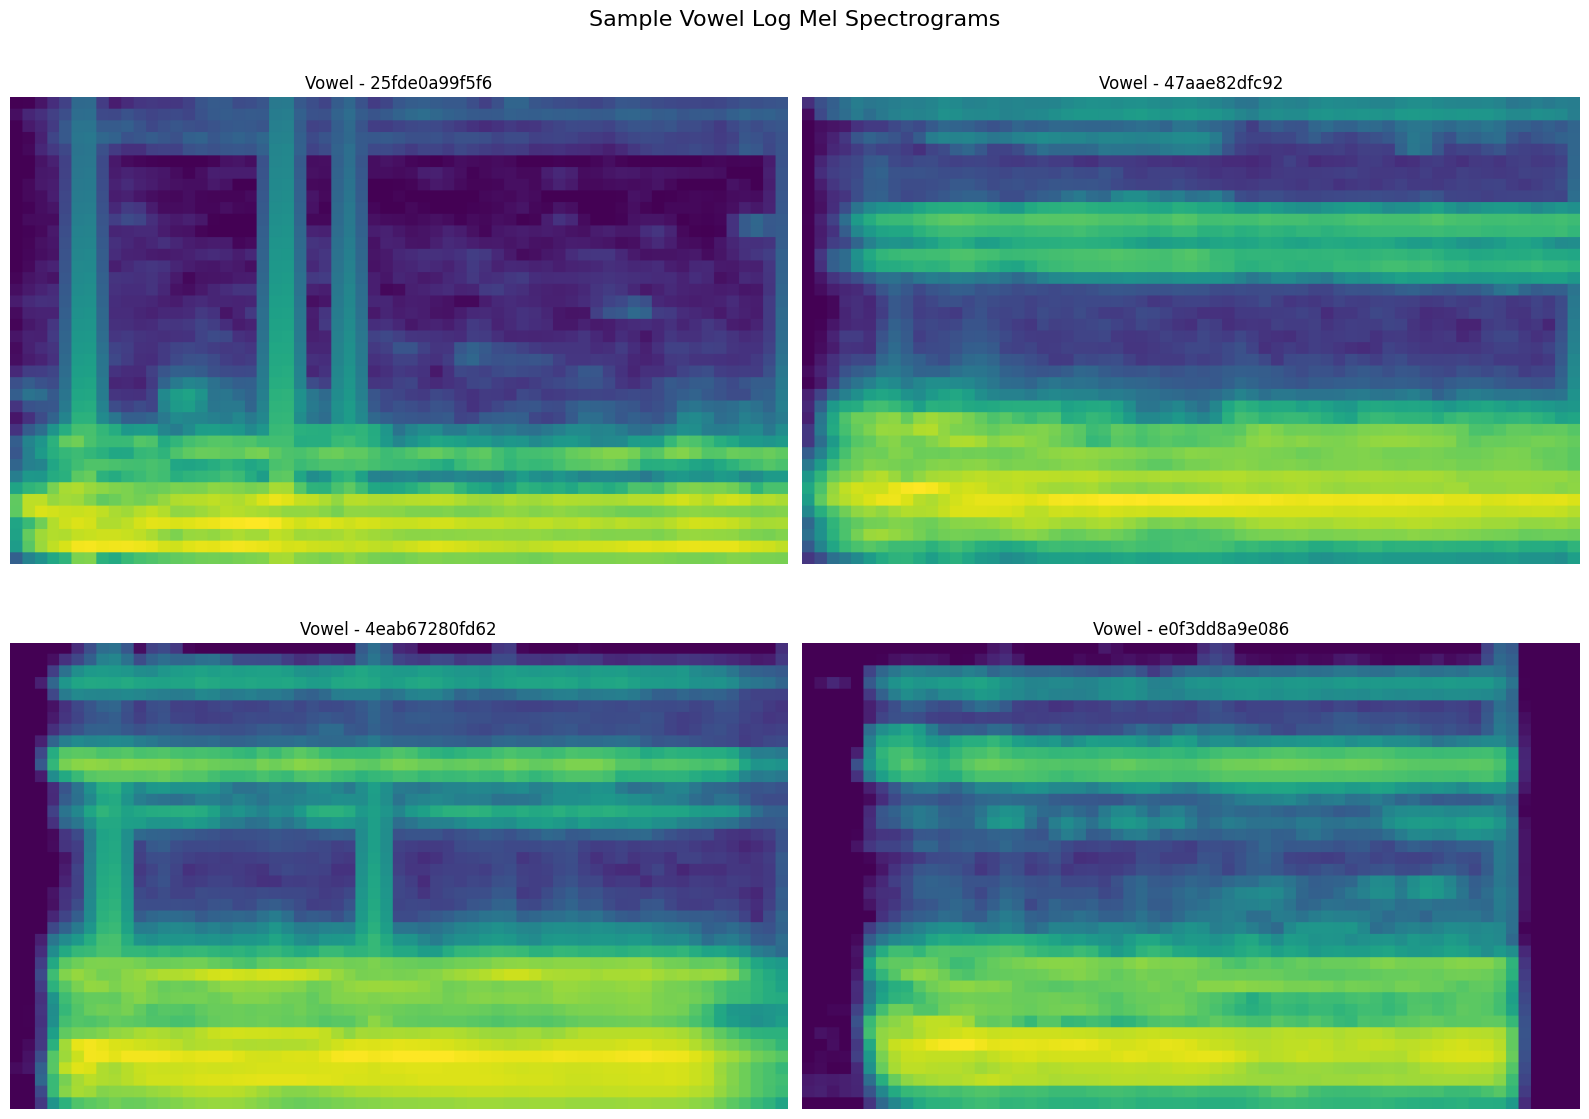

In [14]:
import matplotlib.image as mpimg

# Select random samples
n_samples = 4
sample_cough_images = np.random.choice(cough_images, min(n_samples, len(cough_images)), replace=False)
sample_vowel_images = np.random.choice(vowel_images, min(n_samples, len(vowel_images)), replace=False)

# Display cough samples
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for idx, img_path in enumerate(sample_cough_images):
    img = mpimg.imread(img_path)
    axes[idx].imshow(img)
    axes[idx].set_title(f'Cough - {img_path.parent.name}')
    axes[idx].axis('off')

plt.suptitle('Sample Cough Log Mel Spectrograms', fontsize=16)
plt.tight_layout()
plt.show()

# Display vowel samples
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for idx, img_path in enumerate(sample_vowel_images):
    img = mpimg.imread(img_path)
    axes[idx].imshow(img)
    axes[idx].set_title(f'Vowel - {img_path.parent.name}')
    axes[idx].axis('off')

plt.suptitle('Sample Vowel Log Mel Spectrograms', fontsize=16)
plt.tight_layout()
plt.show()

## 10. Summary

Ringkasan dari seluruh proses

In [15]:
print("\n" + "="*60)
print("FINAL SUMMARY")
print("="*60)

print("\nConfiguration:")
print(f"  Sample Rate: {SAMPLE_RATE} Hz")
print(f"  Duration: {DURATION} seconds")
print(f"  N_FFT: {N_FFT}")
print(f"  Hop Length: {HOP_LENGTH}")
print(f"  Win Length: {WIN_LENGTH}")
print(f"  N_MELS: {N_MELS}")

print("\nInput:")
print(f"  Cough files: {len(cough_files)}")
print(f"  Vowel files: {len(vowel_files)}")
print(f"  Total input files: {len(cough_files) + len(vowel_files)}")

print("\nOutput:")
print(f"  Cough spectrograms: {len(cough_images)}")
print(f"  Vowel spectrograms: {len(vowel_images)}")
print(f"  Total output images: {len(cough_images) + len(vowel_images)}")

print("\nOutput Directories:")
print(f"  Cough: {COUGH_OUTPUT_PATH}")
print(f"  Vowel: {VOWEL_OUTPUT_PATH}")

print("\n" + "="*60)
print("PROCESSING COMPLETE!")
print("="*60)


FINAL SUMMARY

Configuration:
  Sample Rate: 16000 Hz
  Duration: 1.0 seconds
  N_FFT: 1024
  Hop Length: 256
  Win Length: 1024
  N_MELS: 40

Input:
  Cough files: 876
  Vowel files: 869
  Total input files: 1745

Output:
  Cough spectrograms: 876
  Vowel spectrograms: 869
  Total output images: 1745

Output Directories:
  Cough: /mnt/ml_storage/Final_Project/SOURCE2/dataclean_cough_log_mel_1
  Vowel: /mnt/ml_storage/Final_Project/SOURCE2/dataclean_vowel_log_mel_1

PROCESSING COMPLETE!
